In [1]:
import numpy as np
import pandas as pd
import os
import sithom

from utils.makepath import makepath

In [2]:
root_dir = makepath("..", "..")
os.listdir(root_dir)

['paper',
 'gradops',
 '.DS_Store',
 'activate_venv.sh',
 'LICENSE',
 'requirements.txt',
 '.pytest_cache',
 'config',
 'pyproject.toml',
 'tests',
 'utils',
 'docs',
 'TODO.md',
 '.readthedocs.yml',
 'README.md',
 'results',
 'networks',
 'data_lib',
 '.gitignore',
 'encoding_objects',
 'figures',
 'scripts',
 '.gitattributes',
 'train_mri_example.ipynb',
 'report',
 'venv',
 '.git',
 'pdhg',
 'data',
 'results copy',
 'tmp',
 'notebooks',
 'pretrained',
 'mri.egg-info']

In [3]:
R = 8
sigma = "0_05"
scalar_tgv_search_datetime = "21_06_04"

In [20]:
for R in [4, 8]:
    for sigma in ["0_05", "0_10", "0_20"]:
        u_tgv_csv = makepath(
            "u_tgv_fixed",
            "mps",
            f"test-abs-R_{R}-sigma_{sigma}_intermediate_metrics.csv"
        )
        u_tv_csv = makepath(
            "u_tv_fixed",
            "mps",
            f"test-abs-R_{R}-sigma_{sigma}_intermediate_metrics.csv"
        )
        u_tgv_df = pd.read_csv(
            makepath(dir, u_tgv_csv)
        )
        u_tv_df = pd.read_csv(
            makepath(dir, u_tv_csv)
        )
        psnr_diff = u_tgv_df["psnr"] - u_tv_df["psnr"]
        ssim_diff = u_tgv_df["ssim"] - u_tv_df["ssim"]
        print(f"R={R}, sigma={sigma}")
        print(f"PSNR diff: {psnr_diff.mean():.2f} ± {psnr_diff.std():.2f}")
        print(f"SSIM diff: {ssim_diff.mean():.4f} ± {ssim_diff.std():.3f}")
        print()

R=4, sigma=0_05
PSNR diff: -0.17 ± 0.50
SSIM diff: 0.0893 ± 0.027

R=4, sigma=0_10
PSNR diff: 0.04 ± 0.42
SSIM diff: 0.0930 ± 0.029

R=4, sigma=0_20
PSNR diff: 0.29 ± 0.34
SSIM diff: 0.0932 ± 0.034

R=8, sigma=0_05
PSNR diff: -0.03 ± 0.43
SSIM diff: 0.0929 ± 0.033

R=8, sigma=0_10
PSNR diff: 0.14 ± 0.40
SSIM diff: 0.0972 ± 0.035

R=8, sigma=0_20
PSNR diff: 0.35 ± 0.36
SSIM diff: 0.0941 ± 0.040



In [4]:
u_tgv_csv = makepath(
    # "u_tgv",
    # f"test-abs-R_{R}-sigma_{sigma}",
    "u_tgv_fixed",
    "mps",
    f"test-abs-R_{R}-sigma_{sigma}_intermediate_metrics.csv"
)
u_tv_csv = makepath(
    # "u_tv",
    # f"test-abs-R_{R}-sigma_{sigma}",
    "u_tv_fixed",
    "mps",
    f"test-abs-R_{R}-sigma_{sigma}_intermediate_metrics.csv"
)
# scalar_tgv_csv = makepath(
#     "scalar_tgv",
#     f"test-abs-scalar_tgv-best_SSIM-R_{R}-sigma_{sigma}-lambda0_w_0_to_0_2-lambda1_v_0_to_0_2-ternary_iters_20-dt_{scalar_tgv_search_datetime}.csv"
# )

In [5]:
dir = makepath(
    root_dir,
    "results",
    "test_set",
)
os.listdir(dir)

['u_tv',
 'u_tv_fixed',
 '.DS_Store',
 'new_u_tgv',
 'zero_filled',
 'scalar_tv',
 'u_tgv_fixed',
 'u_tgv',
 'new_u_tv',
 'scalar_tgv']

In [6]:
u_tgv_df = pd.read_csv(
    makepath(dir, u_tgv_csv)
)
u_tgv_df.head()

,epoch,iter,loss,psnr,ssim
0,1,1,0.000365,29.926819,0.835538
1,1,2,0.000524,30.551744,0.703722
2,1,3,0.000922,31.800528,0.653179
3,1,4,0.000297,28.881411,0.822814
4,1,5,0.000864,27.384754,0.781535


In [7]:
!ls ../../results/test_set/u_tgv_fixed

mps


In [8]:
u_tv_df = pd.read_csv(
    makepath(dir, u_tv_csv)
)
u_tv_df.head()

,epoch,iter,loss,psnr,ssim
0,1,1,0.000387,29.580742,0.772417
1,1,2,0.000446,30.670418,0.584421
2,1,3,0.000770,31.675247,0.537929
3,1,4,0.000277,28.822674,0.730357
4,1,5,0.000728,27.916145,0.673969


In [9]:
# scalar_tgv_df = pd.read_csv(
#     makepath(dir, scalar_tgv_csv)
# )
# scalar_tgv_df.head()

Mean of PSNR diff: -0.031081723851083955
Std of PSNR diff: 0.4340580438865105


<Axes: >

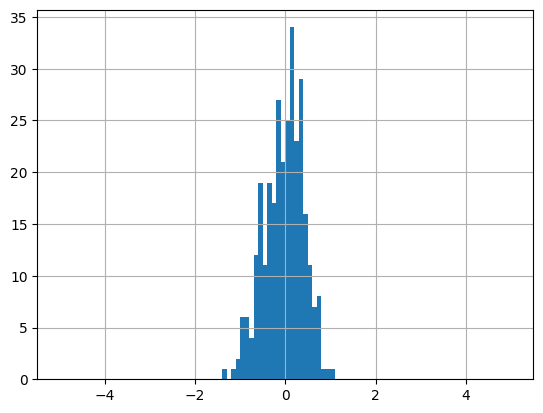

In [14]:
# diff_psnr = u_tgv_df["psnr"] - scalar_tgv_df["PSNR"]
diff_psnr = u_tgv_df["psnr"] - u_tv_df["psnr"]
print(f"Mean of PSNR diff: {diff_psnr.mean()}")
print(f"Std of PSNR diff: {diff_psnr.std()}")
diff_psnr.hist(
    bins=100,
    range=(-5, 5)
)

In [11]:
diff_psnr.std()

0.4340580438865105

In [12]:
diff_psnr.mean()

-0.031081723851083955

<Axes: >

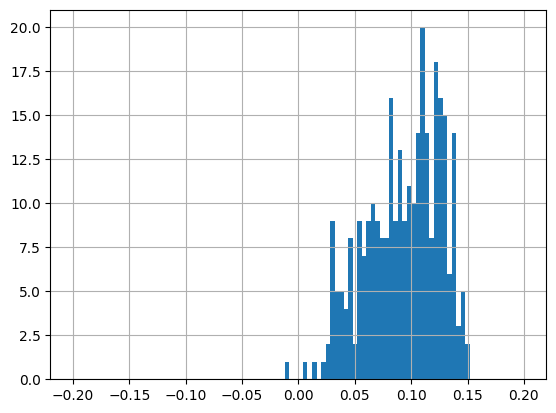

In [13]:
# ssim_diff = u_tgv_df["ssim"] - scalar_tgv_df["SSIM"]
ssim_diff = u_tgv_df["ssim"] - u_tv_df["ssim"]
ssim_diff.hist(
    bins=100,
    range=(-0.2, 0.2)
)

In [22]:
%%time
print("PSNR diff: ", diff_psnr.mean())

PSNR diff:  -0.031081723851083955
CPU times: user 861 μs, sys: 287 μs, total: 1.15 ms
Wall time: 1.29 ms


In [23]:
!pip cache dir

/Users/t/Library/Caches/pip


In [24]:
!ls /Users/t/Library/Caches/pip

http      http-v2   selfcheck wheels
